In [78]:
import os
import sys
from google.colab import drive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Step 1: Data Collection
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/DataScience Academy/Machine Learning/Loan Approval Model/loan_approval_dataset.csv')
train_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Dropping Unnecessary columns

In [18]:
print(f'train_df shape: {train_df.shape}')
drop_cols = ['loan_id']
train_df.drop(drop_cols, axis=1, inplace=True)
print(f'train_df shape after: {train_df.shape}')

train_df shape: (4269, 13)
train_df shape after: (4269, 12)


# Renaming Columns


In [42]:
train_df.rename(columns={" no_of_dependents": "no_of_dependents", " education": "education", " self_employed": "self_employed", " income_annum": "income_annum",
                         " loan_term": "loan_term", " cibil_score": "cibil_score", " residential_assets_value": "residential_assets_value",
                         " commercial_assets_value": "commercial_assets_value", " luxury_assets_value": "luxury_assets_value", " bank_assets_value": "bank_assets_value",
                         " loan_status": "loan_status"}, inplace=True)

In [43]:
train_df.isna().sum()

# no need to clean dataset

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [44]:
train_df['education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


In [45]:
train_df['self_employed'].value_counts()

,count
self_employed,
Yes,2150
No,2119


In [46]:
train_df['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [49]:
train_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# One Hot Encoding string Columns

In [47]:
train_label_enc_df = pd.get_dummies(train_df, columns=['education', 'self_employed', "loan_status"], dtype=int)

In [48]:
train_label_enc_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,0,1


In [50]:
drop_cols = ['education_ Not Graduate', "self_employed_ No", "loan_status_ Rejected"]
train_label_enc_df.drop(drop_cols, axis=1, inplace=True)
train_label_enc_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,self_employed_ Yes,loan_status_ Approved
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


# Making Plots of some columns

In [66]:
def plot_hist(df, col):
    plt.figure(figsize=(6,3))
    plt.title(f'Histogram of {col}')
    plt.hist(df[col])
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].mean() - df[col].std(), color='y', linestyle='dashed', linewidth=3)
    plt.axvline(df[col].mean() + df[col].std(), color='y', linestyle='dashed', linewidth=3)
    plt.show()

def plot_count_plot(df, col='None'):
    plt.figure(figsize=(6,3))
    plt.title(f'Count plot of {col}')
    sns.countplot(df, x=col)
    plt.show()

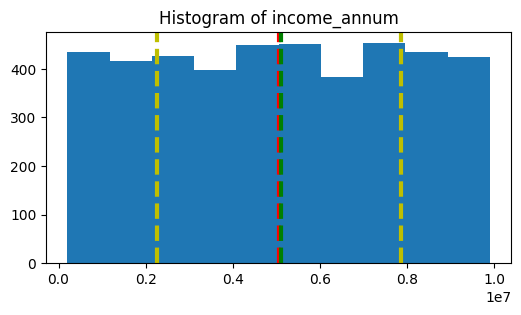

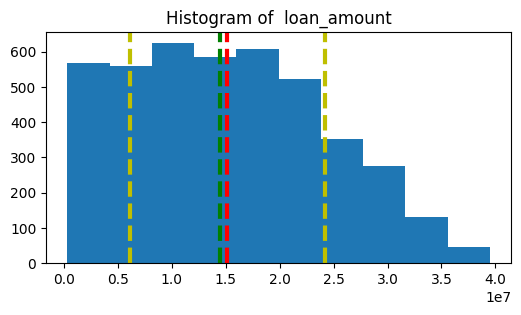

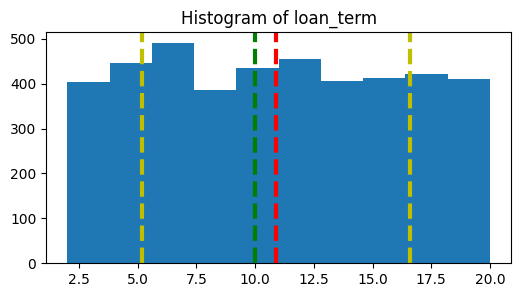

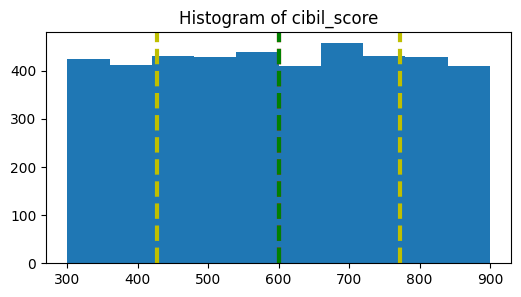

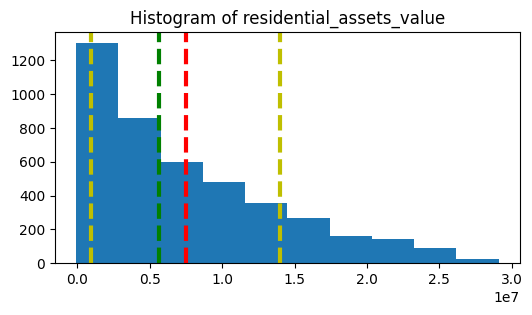

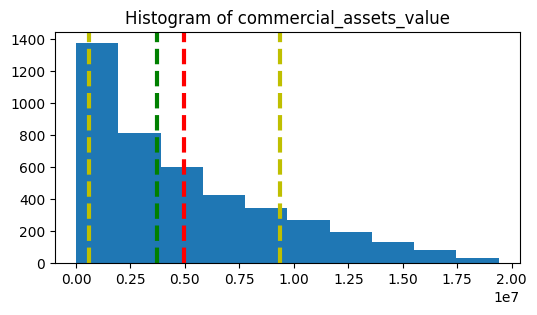

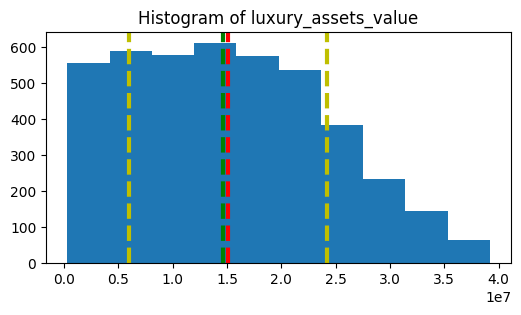

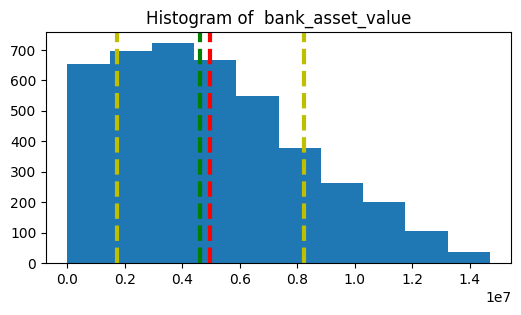

In [61]:
cols_to_hist_plot = ["income_annum", " loan_amount",	"loan_term",	"cibil_score",	"residential_assets_value",	"commercial_assets_value",	"luxury_assets_value",	" bank_asset_value"]
for col in cols_to_hist_plot:
    plot_hist(train_label_enc_df, col)

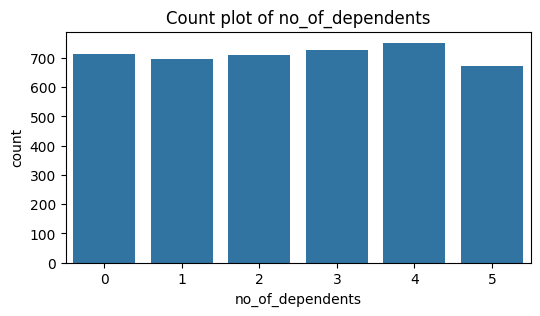

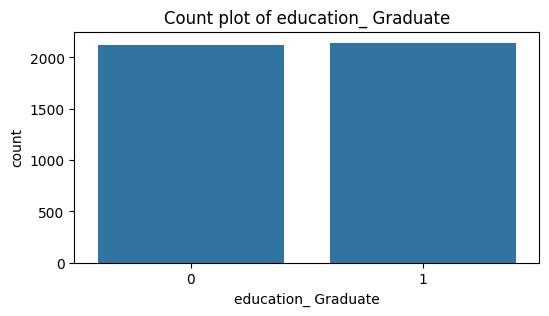

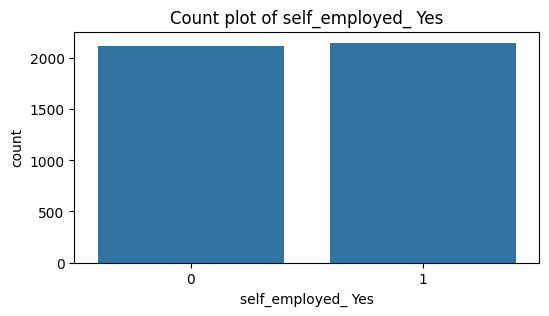

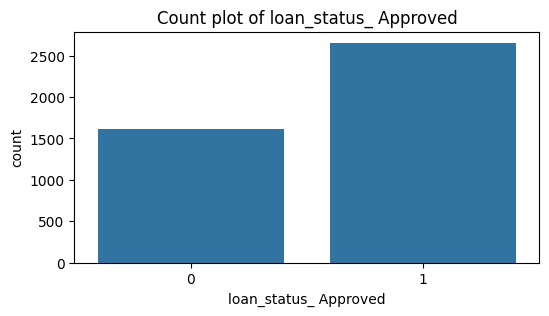

In [67]:
cols_to_count_plot = ["no_of_dependents", "education_ Graduate", "self_employed_ Yes", "loan_status_ Approved"]
for col in cols_to_count_plot:
    plot_count_plot(train_label_enc_df, col)

Performing EDA...


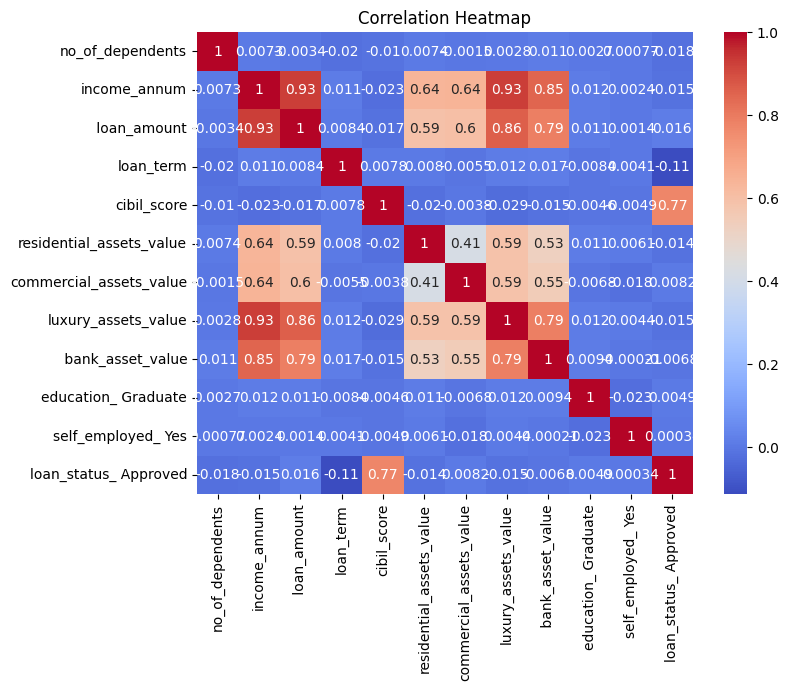

In [69]:
print("Performing EDA...")
plt.figure(figsize=(8, 6))
sns.heatmap(train_label_enc_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Splitting data to Train and Test datasets

In [70]:
X = train_label_enc_df.drop('loan_status_ Approved', axis=1)
y = train_label_enc_df['loan_status_ Approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
def make_confusion_matrix(y_pred, model_title):
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix, {model_title}')
  plt.show()

  print("Classification Report:")
  print(classification_report(y_test, y_pred))

# Evaluating Decision Tree


In [73]:
decisionTreeModel = DecisionTreeClassifier(random_state=42)
decisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluating model...
Accuracy: 0.97


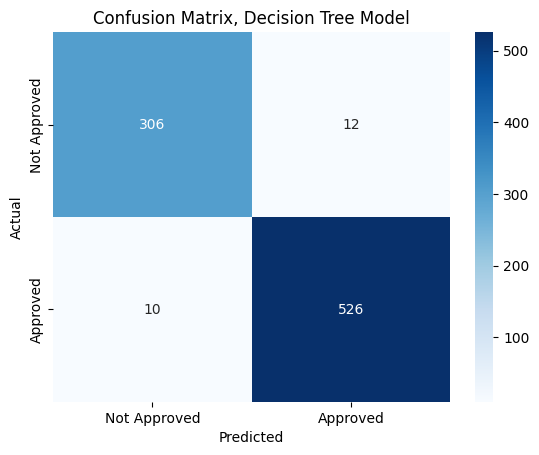

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [90]:
# Evaluation of Decision Tree Model
print("Evaluating model...")
y_pred_dt = decisionTreeModel.predict(X_test)

make_confusion_matrix(y_pred_dt, "Decision Tree Model")

In [91]:
print(y_pred_dt)

[0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 

In [92]:
print(y_test)

1703    0
1173    1
308     0
1322    1
3271    1
       ..
912     1
443     1
1483    1
668     0
1114    0
Name: loan_status_ Approved, Length: 854, dtype: int64


# Evaluating kNN Model


In [93]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Evaluating model...
Accuracy: 0.58


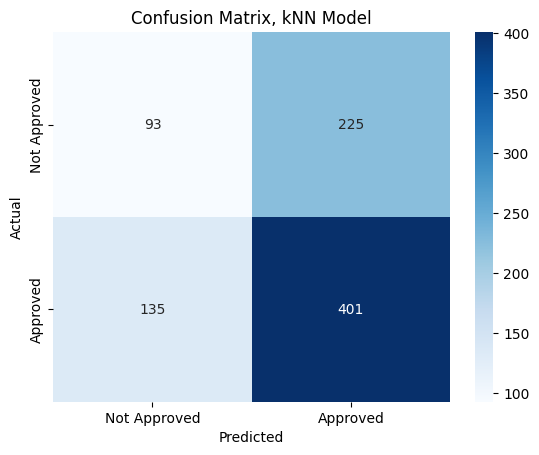

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.29      0.34       318
           1       0.64      0.75      0.69       536

    accuracy                           0.58       854
   macro avg       0.52      0.52      0.52       854
weighted avg       0.55      0.58      0.56       854



In [94]:
# Evaluation of Decision Tree Model
print("Evaluating model...")
y_pred_knn = knn_model.predict(X_test)

make_confusion_matrix(y_pred_knn, "kNN Model")

In [95]:
print(y_pred_knn)

[1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 

In [96]:
print(y_test)

1703    0
1173    1
308     0
1322    1
3271    1
       ..
912     1
443     1
1483    1
668     0
1114    0
Name: loan_status_ Approved, Length: 854, dtype: int64


# Evaluating Logistic Regression Classifier

In [97]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Evaluating model...
Accuracy: 0.73


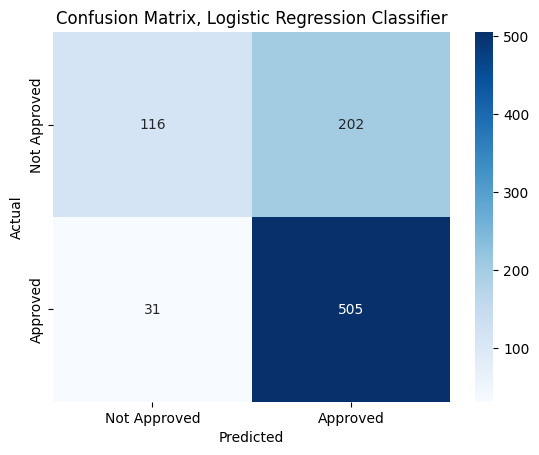

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.36      0.50       318
           1       0.71      0.94      0.81       536

    accuracy                           0.73       854
   macro avg       0.75      0.65      0.66       854
weighted avg       0.74      0.73      0.70       854



In [98]:
print("Evaluating model...")
y_pred_logreg = logreg.predict(X_test)

make_confusion_matrix(y_pred_logreg, "Logistic Regression Classifier")

# Evaluating SVM Model

In [99]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

Evaluating model...
Accuracy: 0.63


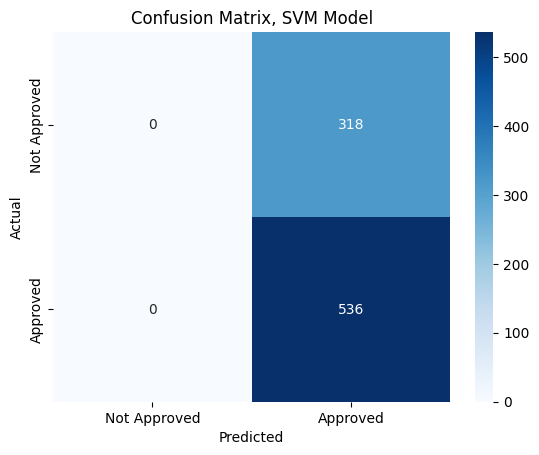

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
print("Evaluating model...")
y_pred_svc = svc.predict(X_test)

make_confusion_matrix(y_pred_svc, "SVM Model")

In [101]:
print(y_pred_svc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# Evaluating Random Forest Model

In [102]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating model...
Accuracy: 0.98


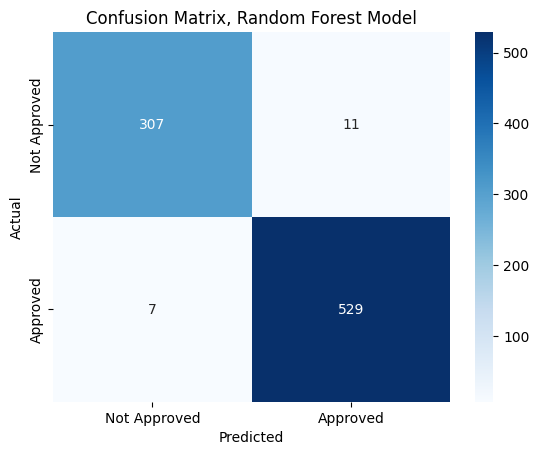

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [103]:
print("Evaluating model...")
y_pred_rf = rf.predict(X_test)

make_confusion_matrix(y_pred_rf, "Random Forest Model")

In [104]:
print(y_pred_rf)

[0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 

# We can observe that Random Forest and Decision Tree are the best algorithms for this particular problem.
They result in 0.98 and 0.97 accuracy